In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import scipy
# from utils import lw_clr
from metpy.units import units
import metpy.calc as mpcalc

import sys
sys.path.append('/Users/clintonalden/Documents/Research/summa_work/')
from utils import lw_clr
from utils import forcing_filler as ff


In [5]:
# read in csv data from Harts Pass SNOTEL
# subset after October 17 as the data is poor before then
harts = pd.read_csv('hrpw1_WY24.csv', skiprows=10)
harts = harts[harts['Date_Time'] > '2023-10-17'] 

# Load template forcing file with correct attributes
template = xr.open_dataset('../summa_forcing_template.nc')

harts.columns

Index(['Station_ID', 'Date_Time', 'air_temp_set_1', 'wind_speed_set_1',
       'snow_depth_set_1', 'solar_radiation_set_1', 'precip_accum_set_1',
       'snow_water_equiv_set_1'],
      dtype='object')

In [7]:
harts = harts[['Date_Time', 'air_temp_set_1', 'wind_speed_set_1', 'solar_radiation_set_1', 'precip_accum_set_1']]
replace = {'air_temp_set_1':'airtemp','wind_speed_set_1':'windspd', 'solar_radiation_set_1':'SWRadAtm', 
           'precip_accum_set_1':'accppt', 'Date_Time':'time'}
harts.rename(columns=replace, inplace=True)

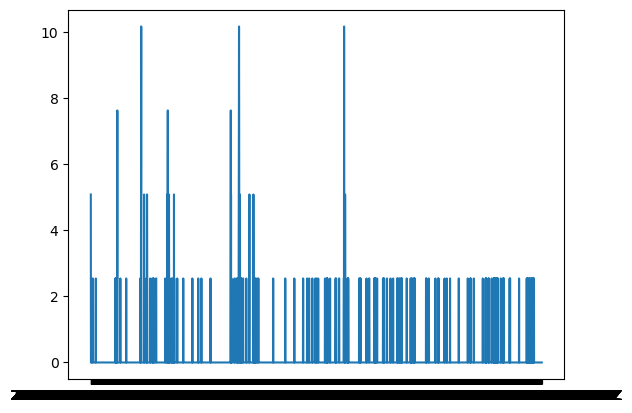

In [15]:
plt.plot(harts.time,harts.accppt.cummax().diff())